# What is an inverse problem

Mathematical models and data play a big role in modern science and engineering. The field of inverse problems bridges these two and studies if and how one can infer model parameters from relevant observations. A prominent example is the famous black hole image, shown in {numref}`blackhole`, that was constructed by merging data from various telescopes {cite}`akiyama`.

```{figure} ./images/what_is/blackhole.png
---
height: 150px
name: blackhole
---
Depiction of a black hole as reconstructed from data recorded by the Event Horizon Telescope.
```

A prominent subfield of inverse problems is that of imaging, with applications in chemistry, biology, geosciences, and medicine. Various methods for imaging have been developed over the previous four decades and have been partly made available for practical use. What sets many of these imaging modalities aside from conventional photography is that the raw data is not interpretable as an image directly. Instead, significant processing using mathematical models is required to obtain a useable image. Next, we give a few examples.

## Applications

### Image processing

Images are of great importance in many applications, ranging from microscopy, medicine, to astronomy. In all these applications, the recorded images are distorted or corrupted versions of the ideal image. The inverse problem consists of reconstructing the idealized image from the measured one.

We can think of a (digital) image as a two dimensional array of pixels where each element could, for example, represent the grey value of the corresponding pixel. A color image could be represented by a tensor containing the RGB intensities for each pixel. Alternatively, we can think of an idealized image as a (vector-valued) function on a bounded domain (say, the unit square).

A mathematical model for the observed image should model the process by which the image was obtained. This often involves [convolving](https://en.wikipedia.org/wiki/Convolution) the image with a filter and adding noise. For example, for a digital image with pixel values $u_{i}$, the measured image can in many cases be modeled as

$$
f_{i} = \sum_{j\in\mathbb{Z}^2} k_{i,j}u_{j},
$$

$i = (i_1,i_2)$ and $j = (j_1,j_2)$ are [multi-indices](https://en.wikipedia.org/wiki/Multi-index_notation) and $k: \mathbb{Z}^2 \times \mathbb{Z}^2 \rightarrow \mathbb{R}$ is the filter.

Representing the image as a function $u : \Omega \rightarrow \mathbb{R}$, we may have

$$
f(x) = \int_{\Omega} k(x-y)u(y)\mathrm{d}y,
$$

where $\Omega \subset \mathbb{R}^2$ is the image domain and $k: \Omega \times \Omega \rightarrow \mathbb{R}$ is the convolution kernel or [*point spread function*](https://en.wikipedia.org/wiki/Point_spread_function).

The resulting inverse problem is to undo the convolution. In some cases, $k$ may not be known perfectly, in which case it is called *blind deconvolution*. Other image-related inverse problems include *denoising*, where a noisy version of the image is measured, and *inpainting*, where a significant part of the pixels are missing. Some examples are shown below.

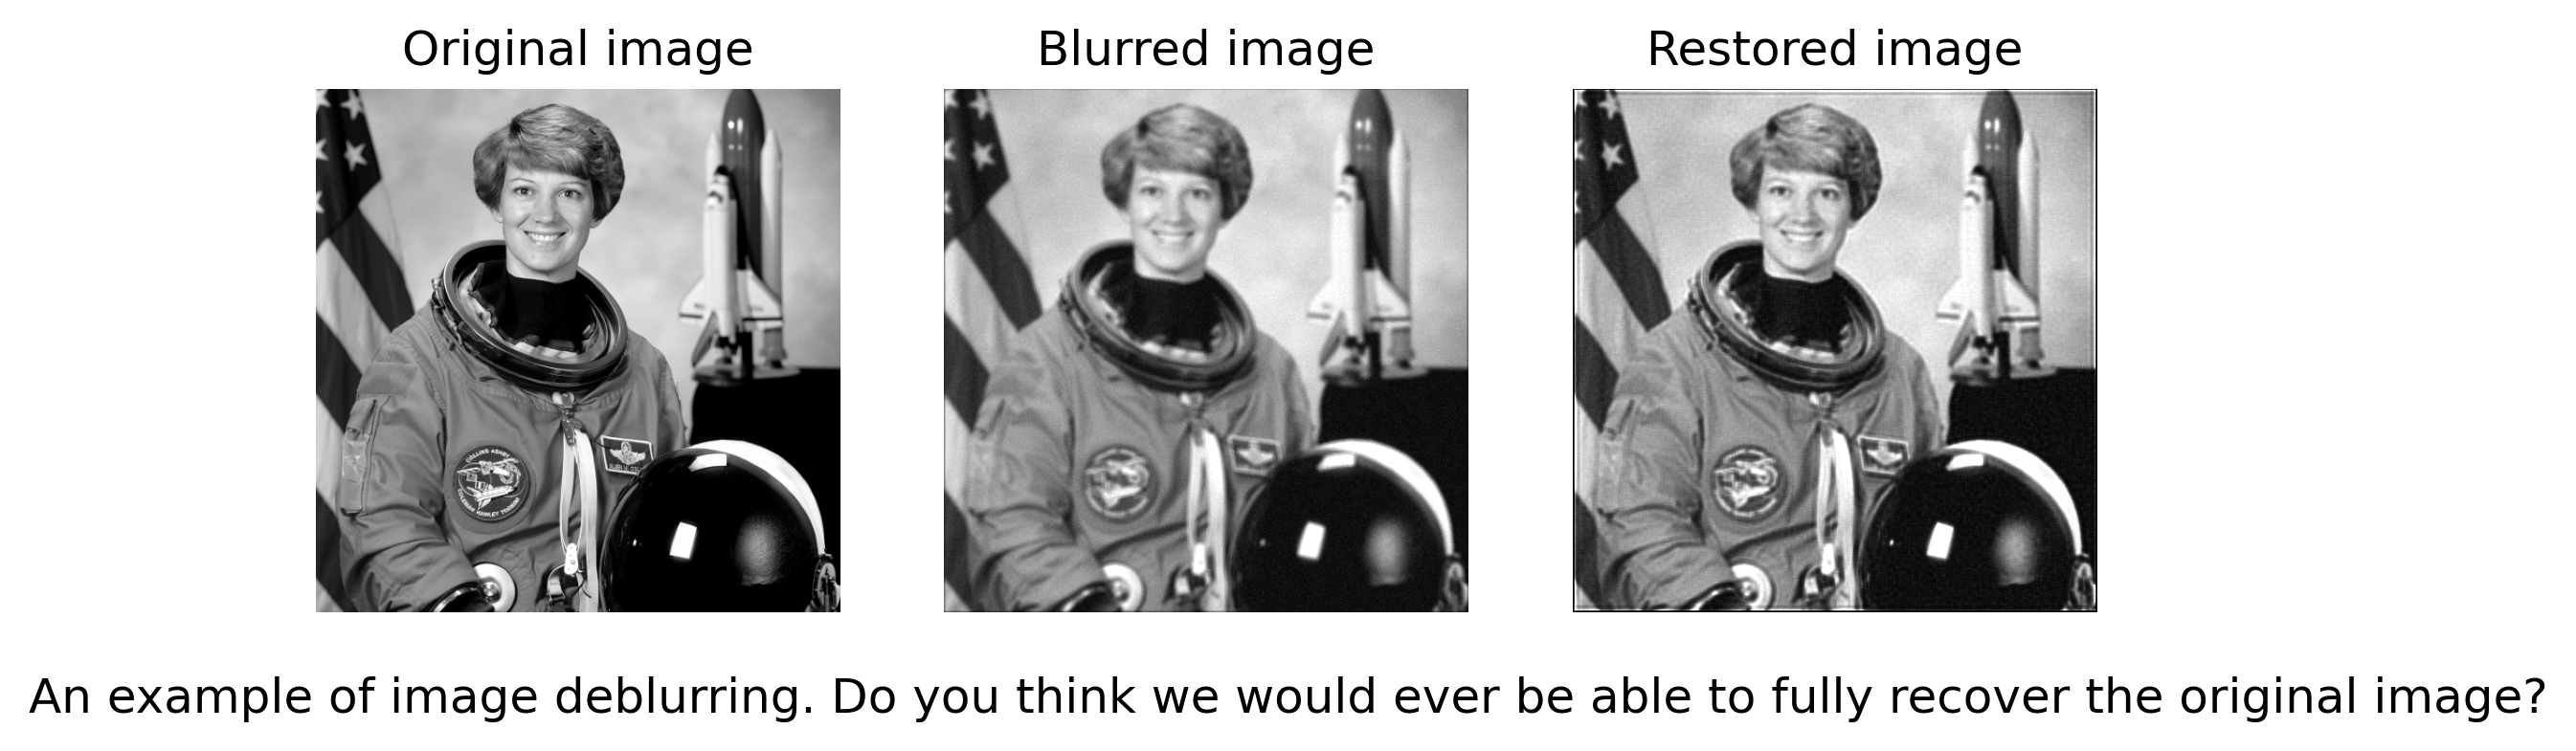

In [1]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from skimage.restoration import inpaint

# load test image and convert to gray-scale
astro = color.rgb2gray(data.astronaut())

## image deblurring

# define blurring kernel (pointspread function)
psf = np.ones((5, 5)) / 25

# convolve image with kernel
astro_blur = conv2(astro, psf, 'same')
astro_blur += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
astro_restored = restoration.richardson_lucy(astro_blur, psf, iterations=10)

# plot results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro, vmin=0, vmax=1)
ax[0].set_title('Original image')

ax[1].imshow(astro_blur,vmin=0, vmax=1)
ax[1].set_title('Blurred image')

ax[2].imshow(astro_restored, vmin=0, vmax=1)
ax[2].set_title('Restored image')

plt.figtext(0,0.25,"An example of image deblurring. Do you think we would ever be able to fully recover the original image?",{"fontsize":12})
plt.show()

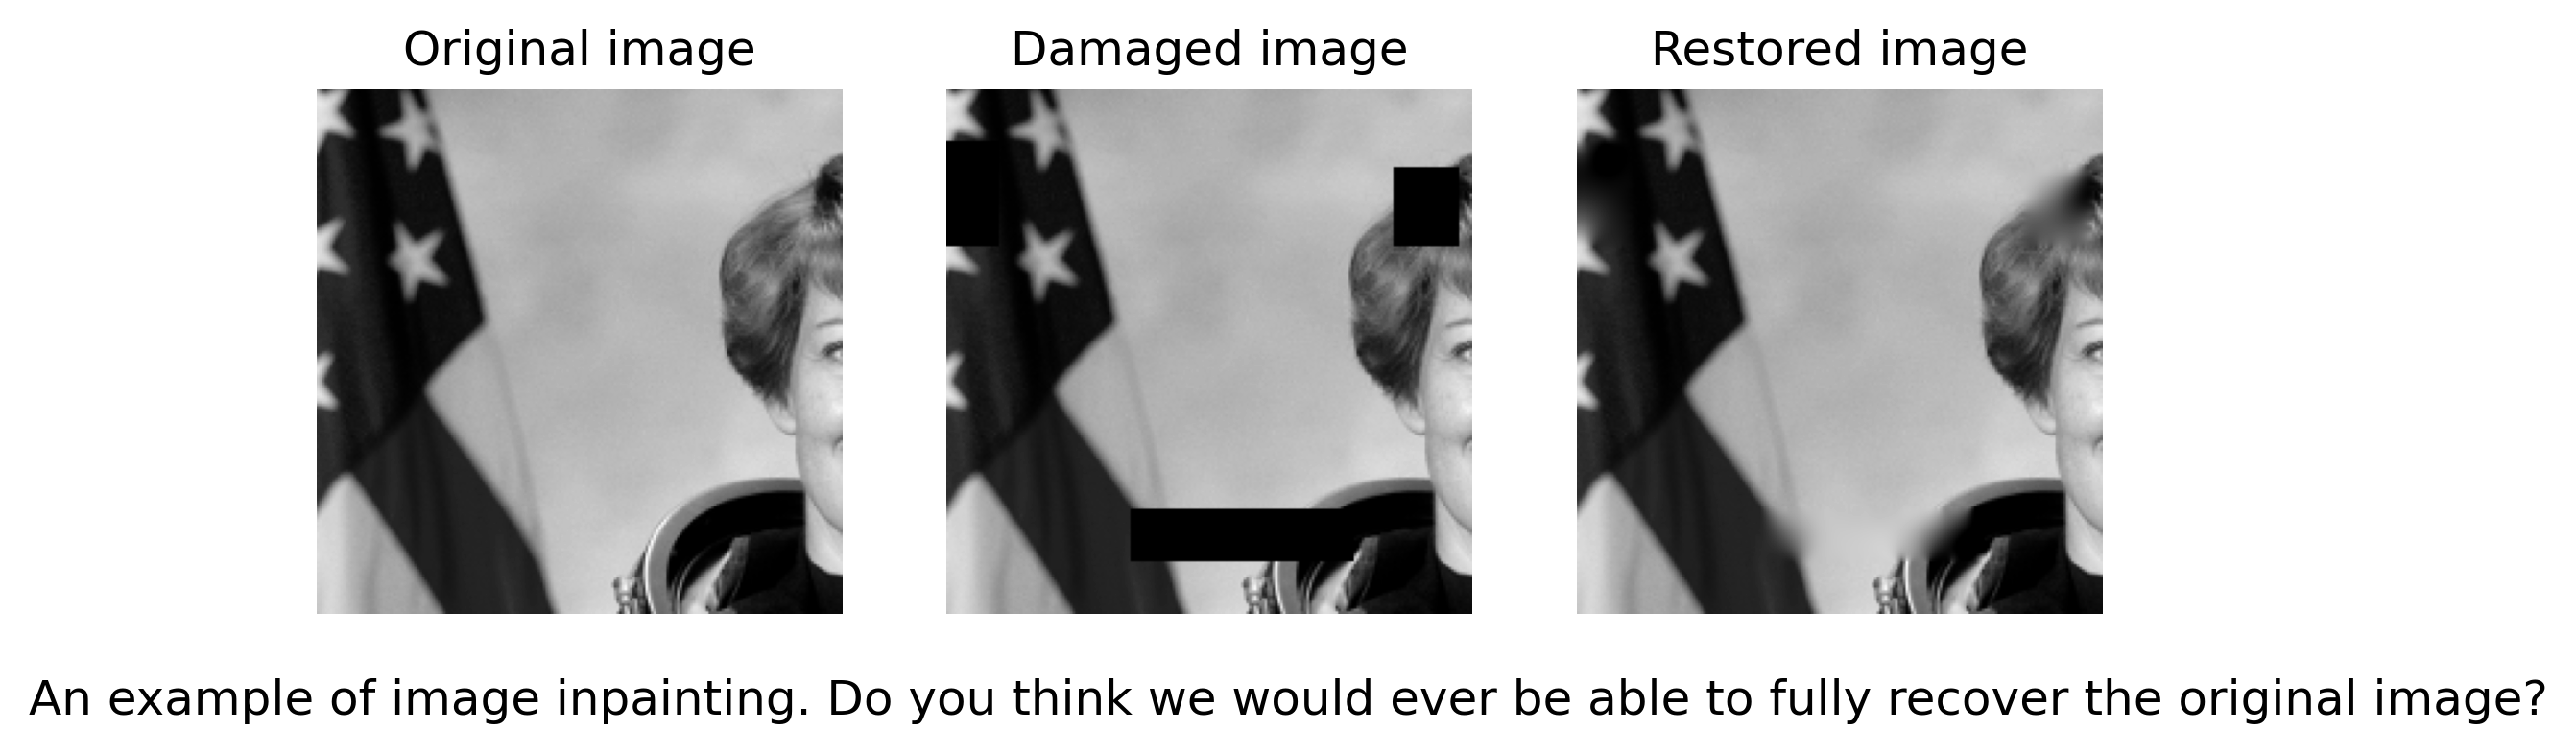

In [2]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from skimage.restoration import inpaint

# load test image and convert to gray-scale
astro = color.rgb2gray(data.astronaut())

## image inpainting

# Create mask with three defect regions: left, middle, right respectively
mask = np.zeros((200,200))
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1

# remove parts of the image
astro_defect = astro[0:200, 0:200].copy()
astro_defect[np.where(mask)] = 0

# inpaint
astro_inpainted = inpaint.inpaint_biharmonic(astro_defect, mask, multichannel=False)

# plot results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro[0:200, 0:200], vmin=0, vmax=1)
ax[0].set_title('Original image')

ax[1].imshow(astro_defect,vmin=0, vmax=1)
ax[1].set_title('Damaged image')

ax[2].imshow(astro_inpainted, vmin=0, vmax=1)
ax[2].set_title('Restored image')

plt.figtext(0,0.25,"An example of image inpainting. Do you think we would ever be able to fully recover the original image?",{"fontsize":12})
plt.show()

### X-ray tomography

A CT-scanner is a common tool for medical diagnosis, providing detailed images of the anatomy of a patient. An example is shown in {numref}`ModernCT`. In other applications, such as materials science, similar techniques are being used to obtain three-dimensional reconstructions of the inner structure of objects.

```{figure} ./images/what_is/ModernCT.png
---
height: 150px
name: ModernCT
---
Modern CT scanner (left). Slice of high resolution CT scan of a patient's lung (right). Source for both: Wikimedia Commons
```

In this case $u: \mathbb{R}^d \rightarrow \mathbb{R}$, represents the density of (a slice of) the object, which may in turn be thought of as an image. Different from the previous section is the relation to the measurements. A useful model for X-ray measurements turns out to be the [*X-ray transform*](https://en.wikipedia.org/wiki/X-ray_transform), which for $d=2$ is equivalent to the [*Radon transform*](https://en.wikipedia.org/wiki/Radon_transform). This transforms the image $u$ to a *sinogram* $f: \mathbb{R}^{d}\times \mathbb{S}^{d-1} \rightarrow \mathbb{R}$ by taking line-integrals along straight lines at various angles and shifts:

$$f(s,\xi) = \int_{\mathbb{R}} u(s + t \xi)\mathrm{d}t,$$

with $\xi \in \mathbb{S}^{d-1}$ a direction on the unit sphere and $s \in \mathbb{R}^d$ denoting the shift.

An example of an image and its corresponding sinogram are shown in figure {numref}`walnut`. It is clear that the sinogram itself is not directly suited for interpretation and we have to solve the inverse problem to get a useful image.

```{figure} ./images/what_is/walnut.png
---
height: 150px
name: walnut
---
Two-dimensional slice through a walnut and the corresponding sinogram.
```

### Magnetic resonance imaging

Magnetic resonance imaging (MRI) is another imaging modality for clinical diagnosis. As opposed to CT, MRI does not rely on ionizing radiation and is hence considered much safer. A disadvantage of MRI is that the time needed for a scan is much longer than for CT.

Here, $u : \mathbb{R}^d \rightarrow \mathbb{C}$, is related to the proton density of the tissue and can be interpreted as an image. The physics behind the measurement process are quite complicated, but for most practical settings a useful model is based on the [*Fourier transform*](https://en.wikipedia.org/wiki/Fourier_transform) of $u$:

$$
\widehat{u}(\xi) = \frac{1}{(2\pi)^{d/2}}\int_{\mathbb{R}^d} u(x)e^{\imath \xi\cdot x}\mathrm{d}x.
$$

The measurements $f$ are a finite set of samples of the spectrum $\widehat{u}$:

$$
f_i = \widehat{u}(\xi_i), \quad i = 1, 2, \ldots, m.
$$

Note that when a fully sampled spectrum is available, we can easily retrieve $u$ via the *inverse Fourier transform*:

$$
u(x)= \frac{1}{(2\pi)^{d/2}}\int_{\mathbb{R}^d} \widehat{u}(\xi) e^{-\imath \xi\cdot x}\mathrm{d}\xi.
$$

The challenge here lies in retrieving $u$ from a limited set of samples. As the time needed for a scan is proportional to the number of samples acquired, much research is being done on devising methods to recover images from under-sampled Fourier measurements.

### Seismic inversion

In seismic inversion, the goal is to infer physical properties of the subsurface from seismic measurements. Here, $u$ represents (for example) the elastic material parameters of the rock or the signature of an earth-quake. The measurements are typically time series of ground motion recorded by seismographs. A typical experimental setup is depicted in {numref}`seismic_acquisition`. A typical image resulting from such data is shown in {numref}`seismic_image`.

```{figure} ./images/what_is/Diagram_of_a_marine_seismic_survey.png
---
height: 150px
name: seismic_acquisition
---
A typical seismic acquisition setup.
```

```{figure} ./images/what_is/seismic_image.jpg
---
height: 150px
name: seismic_image
---
A typical seismic image depicting various earth layers.
```

The simplest example is when the underlying physics can be described by a simple scalar wave equation:

$$
\partial_t^2 p(t,x) - c(x) \nabla_x p(t,x) = q(t,x), \quad x \in\Omega, \quad t\in [0,T]
$$

where $p(t,x)$ denotes the *wave field*, $c(x)$ is related the sound speed and density of the medium and $q$ is a source term. The measurements are given by

$$
f_i(t) = p(t,x_i), \quad i \in \{1, 2, \ldots, m\}.
$$

The inverse problem consists of retrieving either $c$ or $q$ from the measurements $\{f_i\}_{i=0}^m$. In particular we distinguish two inverse problems

* *Inverse source problem*: The measurements $f$ are linear in terms of $q$, leading to a linear inverse problem to retrieve $q$. In earth-quake localization, the source is for example parametrized as $q(t,x) = u_1(t)u_2(x)$ in which case the goal is to retrieve $(u_1,u_2)$.

* *Inverse medium problem*: Here the goal is to retrieve $c$, sometimes parametrized as $c(x) = c_0(1 + u(x)).$ Here, the measurements generally depend non-linearly on $u$. However, when $|u| \ll 1$ the relation between $f$ and $u$ may be linearized.

## Anatomy of an inverse problems

We can abstractly formulate most (if not all) inverse problems as finding a solution, $u \in \mathcal{U}$, to the operator equation
```{math}
:label: ip
K(u) = f.
```
Here, $K$ is called the *forward operator*; $u$ is the *image* or *parameter* and $f \in \mathcal{F}$ are the measurements. The forward operator, $K : \mathcal{U} \rightarrow \mathcal{F}$, is a model of the underlying (physical) process and simulates the measurements for given $u$. It could represent for example an integral operator, a matrix, or a set of algebraic equations.
The image/parameters, $u$, constitute a mathematical description of the quantity of interest. It could for example be a function or a vector. The measurements, $f$, are a mathematical representation of the measured data. For the purposes of analysis, we may think of this a function, but in practice measurements are always a finite-dimensional quantity.

For the purposes of this course, we will assume that $\mathcal{U}$ and $\mathcal{F}$ are [Banach spaces](https://en.wikipedia.org/wiki/Banach_space) so we can measure distances between pairs of images and measurements. In many cases, $\mathcal{U}$ and $\mathcal{F}$ will additionally have an inner-product in which case they are [Hilbert spaces](https://en.wikipedia.org/wiki/Hilbert_space).

An important notion in inverse problems is *ill-posedness*. We call a problem *ill-posed* if it is not *well-posed*:

```{admonition} Definition: *Well-posedness according to Hadamard*
:class: important

The equation $K(u) = f$ is *well-posed* if *all* three criteria are met:

* **Existence.** There exists at least one $u$ for which $K(u) = f$
* **Uniqueness.** There is exactly one $u$ for which $K(u) = f$
* **Stability.** The solution depends continuously on the data, i.e., there is a constant $C < \infty$ such that $\|u - u'\| \leq C \|f - f'\|$ where $K(u) = f$ and $K(u') = f'$.

If the problem is not well-posed, we call it *ill-posed*.
```

It may seem strange that equation {eq}`ip` may not have a solution. After all, are the measurements not the result of the forward operator applied to some ground-truth $\overline{u}$? We need to keep in mind here that $K$ is only a *model* for the underlying process. In reality, the measurements may include *modeling errors* and *measurement errors*. We will denote the noisy data by $f^{\delta}$. An often-used model to incorporate such errors is the *additive noise model*

$$
f^{\delta} = K(\overline{u}) + e,
$$

where $e$ represents the combined measurement and modeling error with $\|e\| \leq \delta$. If we find a $u$ for which $Ku^{\delta} = f^{\delta}$, we can ask ourselves how big the *backward error* $\|u^{\delta} - \overline{u}\|$ is with respect to the *forward error* $\|e\|$. In practice we call a problem ill-posed if a small error in the data can cause a large error in the reconstruction.

## Motivating examples

### Rootfinding
Given a continuous function $K : \mathbb{R} \rightarrow \mathbb{R}$, and $f \in \mathbb{R}$ find $u$ such that $K(u) = f$. The [inverse function theorem](https://en.wikipedia.org/wiki/Inverse_function_theorem) tells us that
the inverse of $K$ exists (at least locally around $u$) if $K$ is continuously differentiable at $u$ with $K'(u)\not= 0$. The solution is in this case give by $u = K^{-1}(f)$. For sensitivity we consider $K(u) - K(v) = f - g$, leading to

$$
u - v = K^{-1}(f) - K^{-1}(g) = \left(K^{-1}\right)'(\xi)(f-g), \quad \xi \in [f,g].
$$

We can thus derive the error bound

$$
|u - v| \leq C |f - g|,
$$

with

$$
C = \sup_{\xi\in [f,g]} \left|\left(K^{-1}\right)'(\xi)\right| = \sup_{\xi\in [f,g]} \left|\frac{1}{K'\left(K^{-1}(\xi)\right)}\right|.
$$

We conclude that the problem of finding a root of $K(u) - f$ is ill-posed when the derivative of $K$ is small near the root.

### Matrix inversion
Matrix inversion is a prime example of a linear inverse problem. These can be written in the form of {eq}`ip` with $u \in \mathbb{C}^n$ and $f \in \mathbb{C}^n$ being $n$-dimensional vectors and $K \in \mathbb{C}^{n \times n}$ being a matrix. For now, we further assume $K$ to be a [Hermitian](https://en.wikipedia.org/wiki/Hermitian_matrix), [positive definite matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix). In that case we know from the [spectral theorem](https://en.wikipedia.org/wiki/Spectral_theorem) that there exist real positive eigenvalues $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n > 0$ and corresponding orthonormal eigenvectors $k_j \in \mathbb{C}^n$ for $j \in \{ 1,\cdots,n \}$ such that $K$ can be written as

$$
K = \sum_{j=1}^n \lambda_j k_j k_j^{*}.
$$

Under these conditions $K$ is invertible so *existence* and *uniqueness* of a solution of {eq}`ip` are guaranteed. Regarding *stability*, however, it is well known from numerical linear algebra that a small perturbation of $f$ may lead to large perturbation of the corresponding solution if the matrix is *ill-conditioned*. In particular, we have

$$
\frac{\|u - u^\delta\|}{\|u\|} \leq \kappa(K) \frac{\|f - f^\delta\|}{\|f\|},
$$

where $\kappa(K) = \|K^{-1}\|\|K\|$ is called the [*condition number*](https://en.wikipedia.org/wiki/Condition_number) of $K$. Hence, we observe that in the worst case an error in the measured data is amplified by the condition number. A matrix with large $\kappa$ is therefore called *ill-conditioned*.

### Differentiation

Here, we are given a [continuously differentiable function](https://en.wikipedia.org/wiki/Smoothness) $f \in C^{1}([0,1])$ with $f(0) = 0$ and define the forward operator as

$$
Ku(x) = \int_0^x u(y) \mathrm{d}y.
$$

We immediately find that the solution is given by $u(x) = f'(x)$. Hence, the solution is well-defined and unique. For sensitivity, assume that we are given a noisy version of the signal $f^{\delta} = f + n^{\delta}$, with $n^{\delta} \in L^{\infty}([0,1])$, with $L^{\infty}([0,1])$ denoting the [space of bounded measurable functions](https://en.wikipedia.org/wiki/L-infinity). An example of such noise is

$$
n^{\delta}(x) = \delta \sin(x/\delta).
$$

It is not hard to show in this case that the forward error $\|f^{\delta} - f\|_{L^{\infty}([0,1])} \rightarrow 0$ as $\delta \rightarrow 0$ but that the backward error $\|u - u^{\delta}\|_{L^{\infty}([0,1])}$ is constant. In the exercises we will see that the ill-posedness can be alleviated to some extent by demanding more regularity from the noise.

## Solving an inverse problem

### Direct methods
In some special cases we can derive an explicit expression for (an approximation) of the solution of $K(u) = f$. For example, if $K$ represents a quadratic equation in one variable or a system of linear equations. In other cases, we may have an explicit expression for the inverse of a slightly modified forward operator, $\widetilde{K}$. This modified operator arises when the original inverse problem is ill-posed and is replaced by a modified inverse problem $\widetilde{K}(u) = f$ which is well-posed. The hope, in the latter case, is that $\widetilde{K}$ approximates $K$ well for the class of solutions we are looking for.

````{admonition} Example: *Inverting a rank-deficient matrix.*
Consider the matrix 

$$
K = \left(\begin{matrix} 1 & 1\\ 2 & 2 \end{matrix}\right).
$$

Obviously this matrix is singular, so there is no way to define the inverse in the usual sense. However, modifying the matrix slightly

$$
\widetilde{K} = \left(\begin{matrix} 1 + \alpha & 1\\ 2 & 2 + \alpha\end{matrix}\right),
$$

allows us to compute the inverse. Indeed, given $f = K\overline{u}$ with $\overline{u} = (1,2)$ we have $f = (3,6)$. Applying the inverse of $\widetilde{K}$ we get $\widetilde{u} \approx (1,2)$. The corresponding equations are visualized in {numref}`matrix_inversion`.

```{glue:figure} matrix_inversion
:figwidth: 300px
:name: "matrix_inversion"

Original and regularized equations. We see that the regularized equations have a unique solution, but this solution is slightly biased towards the origin.
```

````

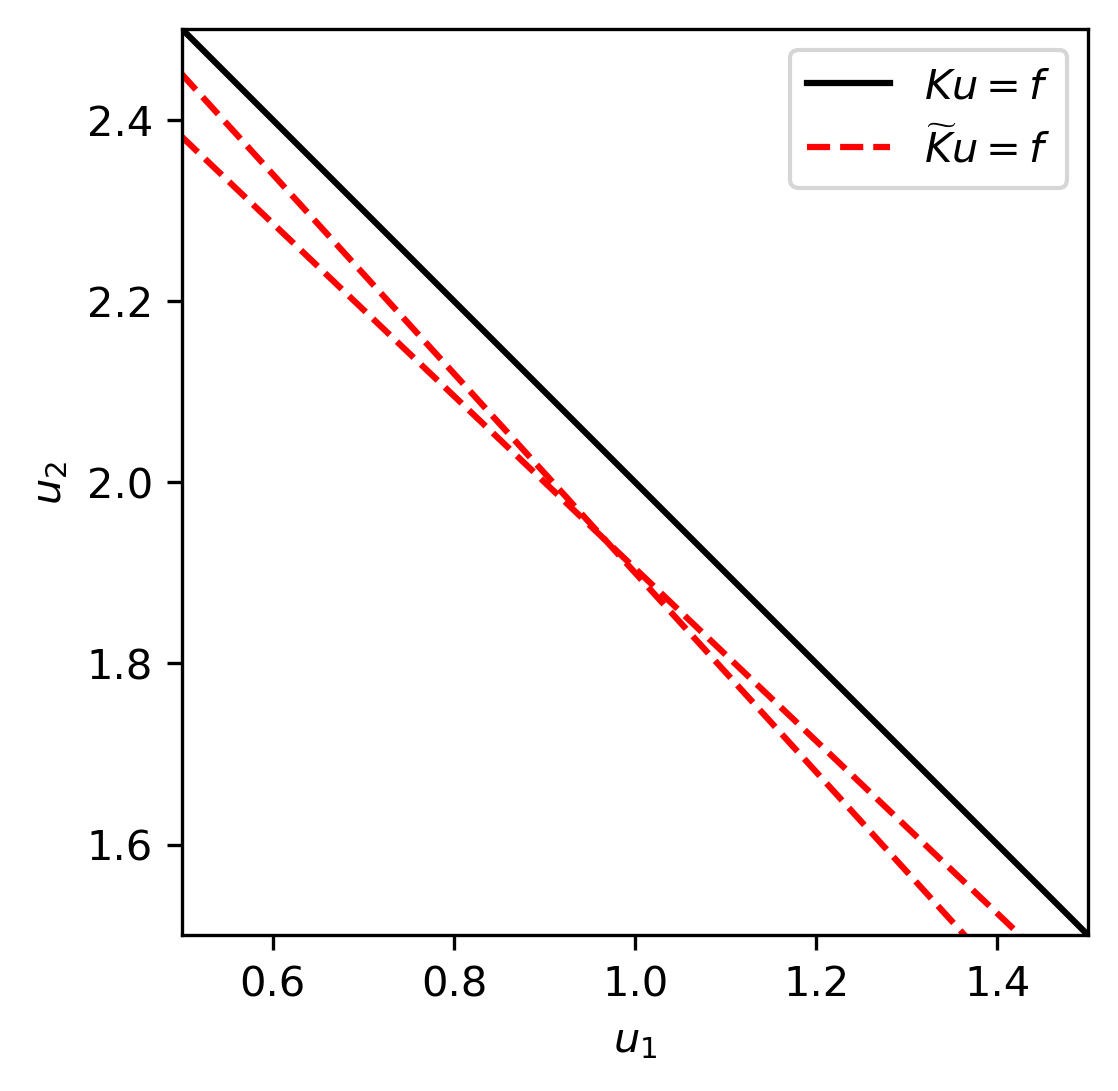

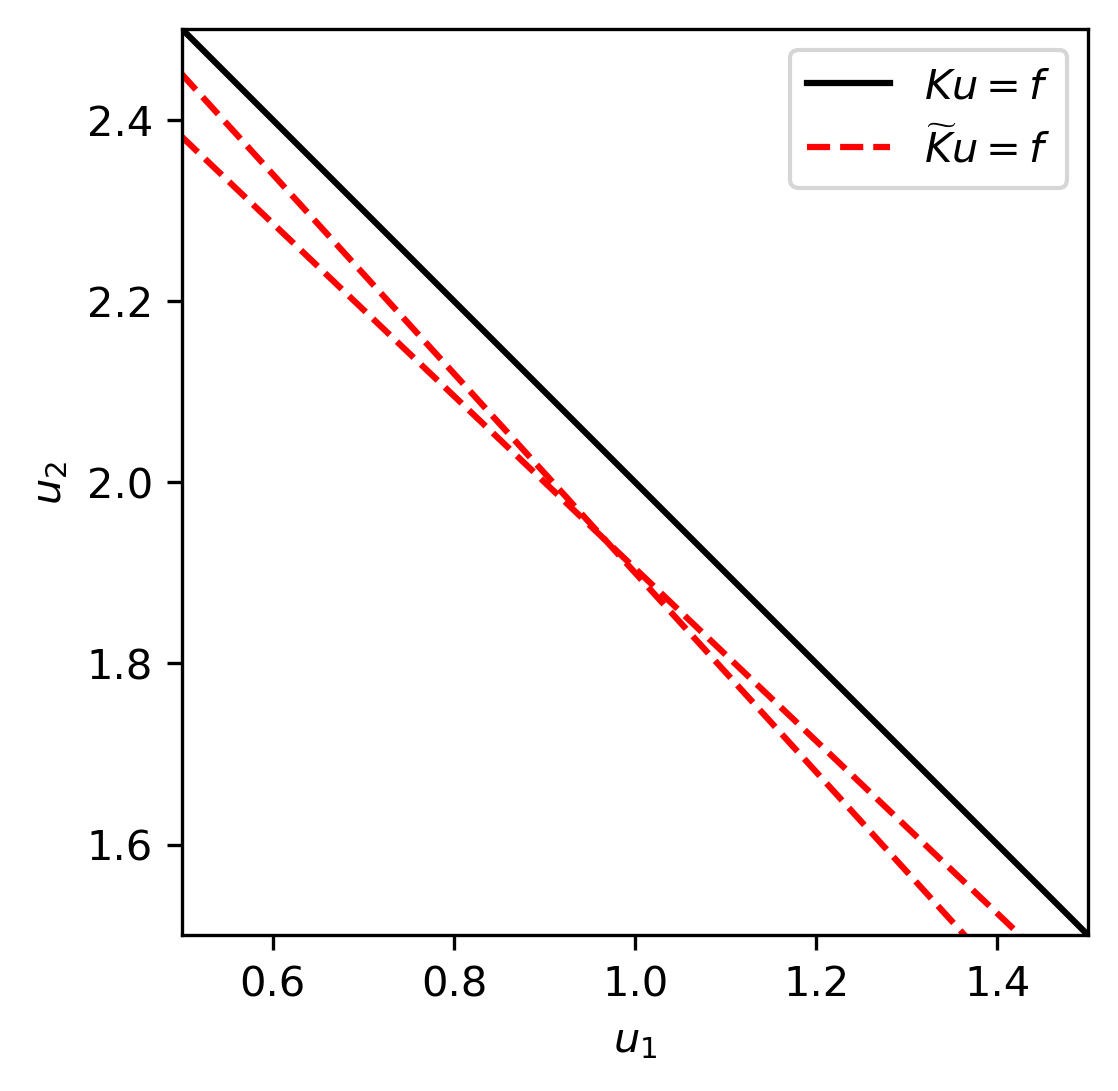

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from myst_nb import glue

u1 = np.linspace(0,5,100)
u2 = np.linspace(0,5,100)

fig,ax = plt.subplots(1,1)

alpha = 1e-1

ax.plot(u1,3-u1,'k',label=r'$Ku=f$')
ax.plot(u1,3-(1+alpha)*u1,'r--',label=r'$\widetilde{K}u=f$')
ax.plot(u1,(6-2*u1)/(2+alpha),'r--')

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_xlim([0.5,1.5])
ax.set_ylim([1.5,2.5])
ax.set_aspect(1)
ax.legend()
plt.show()
glue("matrix_inversion", fig, display=False)

### Variational methods
Variational methods are a popular and quite generally applicable technique for solving inverse problems. The idea is to replace the original equation $K(u) = f$ by a minimization problem. To do this, one constructs an optimization problem with a functional consisting of two terms. The first part is the data fidelity and is supposed to ensure that $K(u) \approx f$.
The second part is the regularization functional which incorporates the a-priori information on $u$. Thereby, we obtain a problem of the form

$$
\min_{u \in \mathcal{U}} D(u,f) + \alpha R(u)
$$

where further a-priori information on the class of images $u$, over which we minimize, can be contained, e.g. non-negativity for density images. The data fidelity term $D$ should be constructed in such a way, that $D$ attains its minimum (often normalized at zero) if the data are reconstructed exactly. The regularization functional should be constructed in such a way, that $R$ attains a small value if the image matches the a-priori information very well, and a very large value, if the image does not fit to the available a-priori information. As a result, such images will be unlikely to minimize the functional. The parameter $\alpha$ weights the two parts of the functional. For very small $\alpha$ the emphasis lies on fitting the data, whereas with increasing $\alpha$ the regularization gains in importance in this ratio, which is particularly essential if measurement errors or noise can be expected.

````{admonition} Example: *Solving a quadratic equation.*

We illustrate this principle by a simple example. We search for a *small* solution of the following quadratic equation

$$
	u^2 - f_1 u + f_2 = 0,
$$

with the given data $f_1=1.1$ and $f_2 = .1$.
With the solution formula for quadratic equations we obtain two solutions

$$
	u_1 = 0.1 \qquad \text{and} \qquad u_2 = 1.
$$

With our a-priori information of a *small* solution we obviously choose the solution $u_1$. However, this is only possible in this specific case, because we can indeed compute *all* solutions. For more complicated problems this is not possible anymore. Moreover, we have to face measurement errors, such that we should better compute an approximate solution in a robust manner than many exact solutions. A variational approach can be realised for this example by minimizing the functional

$$
	J(u) = (u^2 - f_1 u + f_2)^2 + \alpha u^2.
$$

For $\alpha$ large, this functional has a global minimum around $u = 0$, while for $\alpha$ small, it still has multiple minima. However, for suitable $\alpha$, we have a global minimum at $u \approx 0.1$ and minimzing the regularized problem yields (an approximation of) the smaller solution, as illustrated in {numref}`quadratic`.

```{glue:figure} quadratic
:figwidth: 300px
:name: "quadratic"

Original quadratic equation and functional to be minimized. We see that minimizing the functional picks out one of the two solutions.
```
````

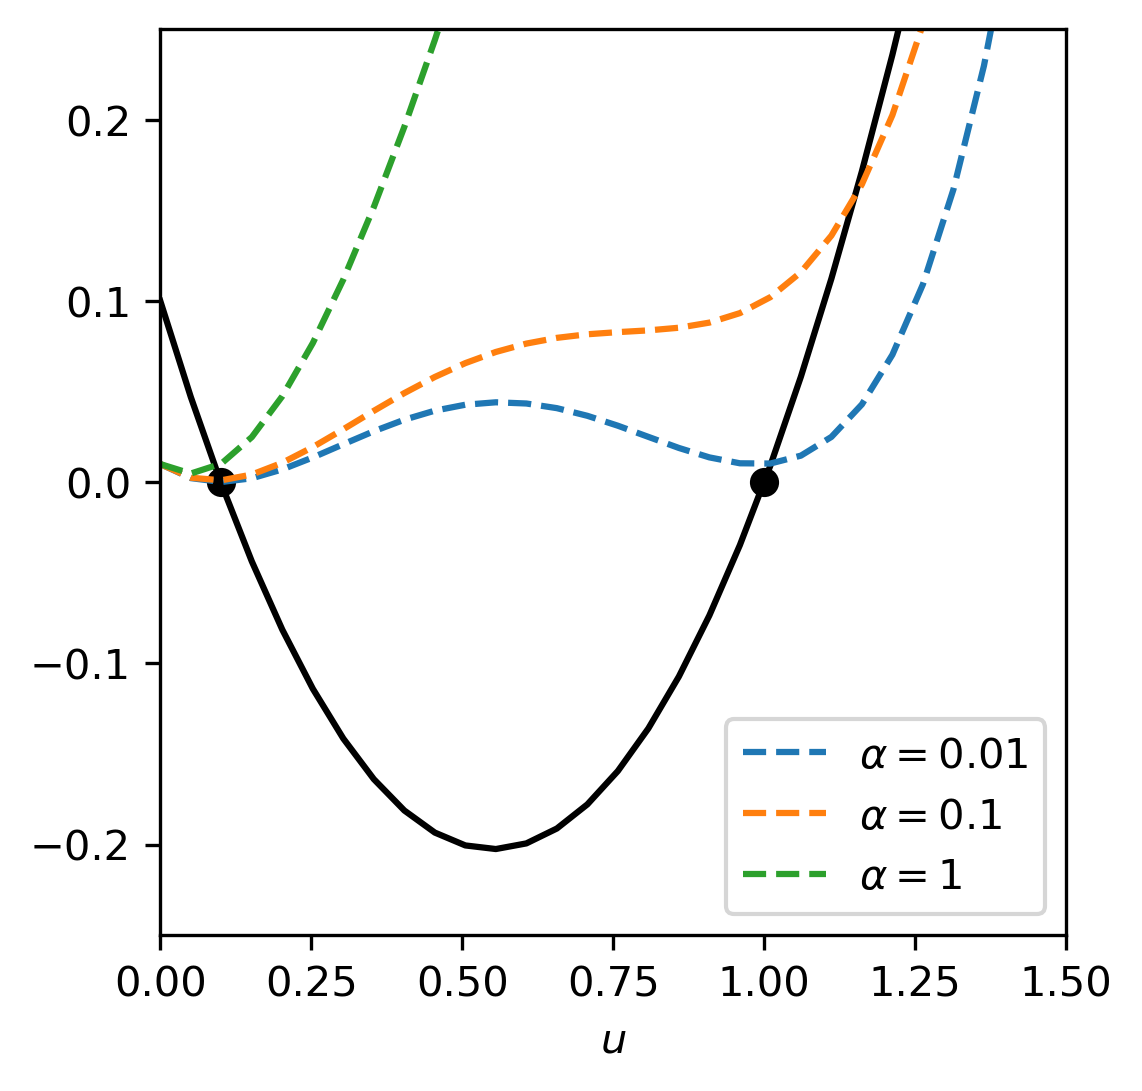

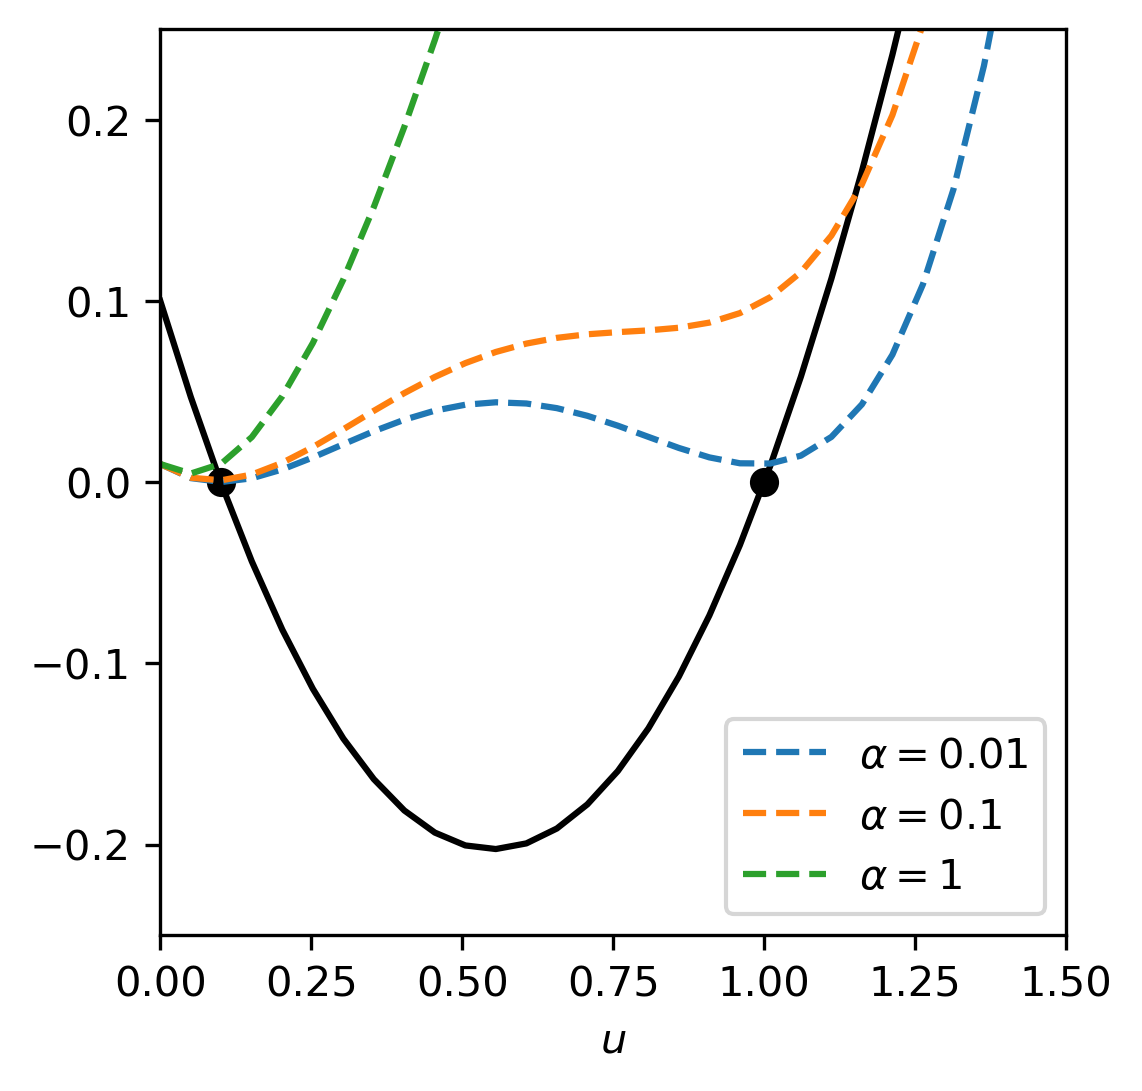

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

u = np.linspace(0,5,100)

fig,ax = plt.subplots(1,1)

alpha = [1e-2, 1e-1, 1]

ax.plot(u,u**2 - 1.1*u + 0.1,'k')
ax.plot(0.1,0,'ko')
ax.plot(1,0,'ko')

for k in range(len(alpha)):
    ax.plot(u,(u**2 - 1.1*u + 0.1)**2 + alpha[k]*(u**2),'--',label=r'$\alpha=$'+str(alpha[k]))

ax.set_xlabel(r'$u$')
ax.set_xlim([0,1.5])
ax.set_ylim([-0.25,.25])
ax.set_aspect(3)
ax.legend()
plt.show()
glue("quadratic", fig, display=False)

## Excercises

### Matrix inversion I
We want to solve a system of linear equations $Ku = f$ with :

1. $$K = \left(\begin{matrix} 1 & 2 \\ 2 & 1\end{matrix}\right), \quad f = \left(\begin{matrix} 1 \\ 1 \end{matrix}\right),$$

2. $$K = \left(\begin{matrix} 1 & 1 \\ 1 & 1.001\end{matrix}\right), \quad f = \left(\begin{matrix} 1 \\ 1 \end{matrix}\right),$$

3. $$K = \left(\begin{matrix} 1 & 1 \\ 2 & 1 \\ 2 & 2\end{matrix}\right), \quad f = \left(\begin{matrix} 1 \\ 1 \\ 1\end{matrix}\right),$$

4. $$K = \left(\begin{matrix} 1 & 1 \\ 2 & 1 \\ 2 & 2\end{matrix}\right), \quad f = \left(\begin{matrix} 1 \\ 2 \\ 2\end{matrix}\right),$$

5. $$K = \left(\begin{matrix} 1 & 2 & 1\\ 2 & 0 & 2\end{matrix}\right), \quad f = \left(\begin{matrix} 1 \\ 1 \end{matrix}\right),$$

6. $$K = \left(\begin{matrix} 1 & 0 \\ 0 & 0\end{matrix}\right), \quad f = \left(\begin{matrix} 0 \\ 1 \end{matrix}\right),$$

Is the problem ill-posed? Why? You can compute eigenvalues and vectors numerically, as shown in the example below.

In [5]:
import numpy as np

K = np.array([[1,2],[2,1]])
f = np.array([1,1])

l, V = np.linalg.eig(K)
print("The eigenvalues are:", l)
print("The eigenvectors are:",V[:,0], V[:,1])

The eigenvalues are: [ 3. -1.]
The eigenvectors are: [0.70710678 0.70710678] [-0.70710678  0.70710678]


```{admonition} Answer
:class: hint, dropdown

1. This matrix is invertible, so we only need to check the condition number which we find to be $3$. This is not so large as to cause problems numerically.

2. This matrix is near singular (the columns are nearly linearly dependent). However, it still invertible. The condition number is $\kappa(K) \approx 4\cdot 10^3$. While this would not lead to problems when computing solutions numerically, it may amplify realistic measurement errors. We would call this problem ill-posed.

3. This equation does not have a solution.

4. This equation does have a unique solution $\overline{u} = (1,0)$. It is not immediately clear how to analyse stability in general. We could, for example, look at the first two equations (the last one is the same as the first one) and compute the condition number of the corresponding matrix. This yields $\approx 6.85$, so the system is not ill-posed. Another way to look at it, perhaps, is that adding a small perturbation may make the system inconsistent. As such, we could call the inverse problem ill-posed.
We will learn how to deal with this situation in general in the next chapter.

5. Here, the solutions are of the form $\overline{u} = (1/4,1/4,1/4) + t (-1,0,1)$ for any $t$. Hence, the system is definitely ill-posed.

6. Again, an inconsistent system with no solution.

```

### Matrix inversion II

Given a symmetric, positive definite matrix $K \in \mathbb{R}^{n\times n}$ we want to solve $Ku = f$. Such a matrix can be decomposed as

$$K = \sum_{i=1}^n \lambda_i k_ik_i^{*},$$

where $\lambda_1\geq \lambda_2 \geq \ldots \geq \lambda_n > 0$ are the eigenvalues and $k_i$ denote the eigenvectors. Such a matrix has an inverse given by

$$K^{-1} = \sum_{i=1}^n \lambda_i^{-1} k_ik_i^{*}.$$

To study the well-posedness of the equation we want to bound the *backward error* $\|u - u^\delta\|_2$ in terms of the *forward error* $\|f - f^{\delta}\|_2$ where $Ku = f$ and $Ku^{\delta} = f^\delta$.

1. Show that $\|u - u^\delta\|_2 \leq \lambda_n^{-1} \|f - f^{\delta}\|_2.$
2. Show that the *relative error* is bounded by
$\frac{\|u - u^\delta\|_2}{\|u\|_2} \leq \lambda_1\lambda_n^{-1} \frac{\|f - f^{\delta}\|_2}{\|f\|_2}.$

```{admonition} Answer
:class: hint, dropdown

1. We have $\|u - u^\delta\|_2 = \|K^{-1}(f - f^\delta)\|_2 \leq \|K^{-1}\| \|f - f^\delta\|_2$ with $\|K^{-1}\|$ denoting the operator norm of $K^{-1}$, defined as $\sup_{\|v\|_2=1} \|K^{-1}v\|$. The supremum is attained at $v = k_n$ which leads to $\|K^{-1}\|_2 = \lambda_n^{-1}$.

2. Similarly, we find $\|f\|_2 = \|Ku\|_2 \leq \lambda_1 \|u\|_2$.
```

### Differentiation I

We are given a continuously differentiable function $f \in C^1([0,1])$ with $f(0) =0$ and want to solve the following inverse problem

$$ Ku(x) \equiv \int_0^{x} u(y)\mathrm{d}y = f(x), \quad \text{for} \quad x \in [0,1].$$

It is readily verified that we can find a (unique) solution by differentiation: $u(x) = f'(x)$. To study well-posedness of the problem, we consider *noisy* measurements $f^{\delta}(x) = f(x) + \delta\sin(k x /\delta)$ for fixed  arbitrary $k$ and small $\delta > 0$. Let

$$\|g\|_{L^{\infty}([0,1])} = \sup_{x\in[0,1]} |g(x)|.$$

1. Show that the *forward error* $f - f^{\delta}$ is bounded in the $L^{\infty}$ norm, in particular $\|f - f^{\delta}\|_{L^{\infty}([0,1])} \leq \delta$.
2. Show that the *backward error* $u - u^{\delta}$ can be arbitrarily large, even if $\delta\downarrow 0$: $\|u - u^{\delta}\|_{L^{\infty}([0,1])} = k$.
3. Is the inverse problem ill-posed?

```{admonition} Answer
:class: hint, dropdown

1. Since $|\sin(\cdot)| \leq 1$ we immediately get the desired result.

2. By linearity we have $u - u^\delta = k \cos(k x/\delta)$ and we immediately find the desired result.

3. This shows that the problem is *ill-conditioned*; a small forward error does not guarantee a small backward error, implying that the inverse map is not continuous.
```

## Assignments

### Differentiation II

The analysis in the previous exercise depends crucially on the type of noise we allow. If we assume that $n^{\delta} = f - f^{\delta}$ is bounded by $\delta$ in a different norm, we can get a well-posed problem. Let

$$\|g\|_{W^{1,\infty}([0,1])} = \|g\|_{L^{\infty}[0,1]} + \|g'\|_{L^{\infty}[0,1]},$$

denotes the [$W^{1,\infty}$-Sobolev norm](https://en.wikipedia.org/wiki/Sobolev_space#One-dimensional_case)

1. Assuming that $\|n^{\delta}\|_{W^{1,\infty}([0,1])} = \delta$, show that $\|u - u^{\delta}\|_{L^{\infty}([0,1])} \rightarrow 0$ when $\delta \rightarrow 0$.

2. Can you come up with a type of noise that obeys the assumed bound? Is it reasonable to make such assumptions on the noise?